![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


Al revisar los datos por estaciones se evidencia que para la estacion **1** (invierno) la media de bicicletas rentadas es menor que la de las otras estaciones, esto nos puede indicar que debido al clima invernal la cantidad de personas que renta las biciletas es menor. por otra parte la estacion **3** (Verano) cuenta con la media mas alta para la cantidad de alquilerde biciletas, intuyendo que nuevamente el clima puede influir en este coportamiento, asi como la epoca de vacaciones de verano

In [5]:
# Celda 1.2
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


al ver las horas de alquiler se las horas donde hay menor catidad de alquiler de biciletas esta entre las **23h - 06h** por lo que puede deducirse que estas horas de baja actividad corresponde ahoras de baja actividad en general ya que son horas en donde la mayotia de las personas esta en casa durmiendo y por lo tanto no hay tanta afluencia de personas. De igual manera las horas donde hay un mayor volumen de alquiler es entre las **16h - 19h** esto puede ser ya que la gran mayoria sale de sus actividades cotidianas (trabajo-estudio) con rumbo a sus hogares.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

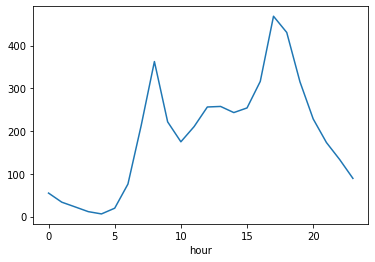

In [6]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

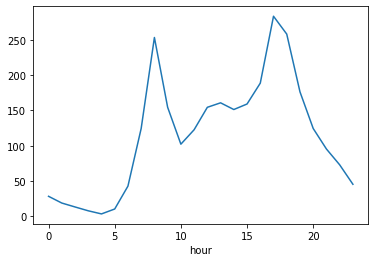

In [7]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
c = bikes["season"] == 1

bikes[c].groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

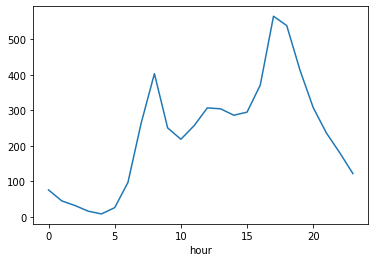

In [8]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 

c = bikes["season"] == 3

bikes[c].groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

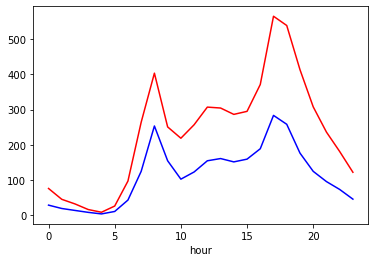

In [9]:
fg, ax = plt.subplots()

c = bikes["season"] == 3
bikes[c].groupby('hour').total.mean().plot(ax=ax, c='r')

c = bikes["season"] == 1
bikes[c].groupby('hour').total.mean().plot(ax=ax, c='b')

en la grafica se evidencia que los picos de consumo ocurren en las mismas horas para las dos estaciones, dichos picos de consumo se evicenian en las horas de la mañana ( 7h-9h) y la tarde (16h-19h) que corresponden a la hora de inicio de actividades y la hora de finalizacion de actividades respectivamente, estas actividades pueden ser estudio ó trabajo.
Sin embargo tienen el mismom comportamiento periodico pero con diferente magnitud, la estacion **3** (verano) tiene mas alquieres que la estacion **1** (invierno), este comportamiento puede ser debido a el clima qe esta presente en cada una de estas estaciones, lo cual hace que incremete o disminuya la cantidad de alquileres en cada una de estas estaciones.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [10]:
# Celda 3

X = bikes[["season","hour"]]
y = bikes["total"]

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop="first")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

encoded = pd.DataFrame(enc.fit_transform(X_train[["season"]]).toarray(),columns = enc.get_feature_names_out(),index=X_train.index)
X_train = pd.concat([X_train,encoded],axis=1)
X_train.drop(columns="season", inplace=True)

lr = LinearRegression()
lr.fit(X_train,y_train)

print(lr.coef_)
print(X_train.columns)

[ 10.6280633   93.8301836  118.74065067  81.14848348]
Index(['hour', 'season_2', 'season_3', 'season_4'], dtype='object')


Segun los coeficientes si se esta en la estacion **3** se tendra un mayori volumen de alquiler lo cual concuerda con lo evidenciado en el analiis descriptivo, de igual manera si se esta en la estacion **1** se "pierde" el incremento de los coeficientes encontrados por la regresion lineal.
En cuanto la variable hour se ve que tiene un coeficiente de ~10.62 que indica que por cada hora que pase se notara un incremento en el alquiler de bicicletas poporcional a este coeficiente, sin embargo conocemos que en altas horas de la noche la cantidad de alquileres no aumenta si no que disminuye. Es con este comportamiento que evidenciamos la limitante de los modelos lineales, los cuales no logran describir relaciones no lineales entre las distintas variables

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [11]:
# Celda 4

# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    

def MSE(y, y_pred):
    if y.shape[0] == 0:
        return 0   
    else:
        mse = ((y-y_pred)**2).mean()
        return mse

In [13]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def mse_split(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    mse_l = MSE(y_l, y_l.mean())
    mse_r = MSE(y_r, y_r.mean())
    
    mse_ = mse_l + mse_r
   
    return mse_

In [14]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])

    # se determina como mejor split inicial np.inf ya que es el valor mas alto que se puede generar
    best_split = [0, 0, np.inf]  # j, split, min_mse

    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            mse = mse_split(X.iloc[:, j], y, split)
            
            if mse < best_split[2]:
                best_split = [j, split, mse]
    
    return best_split

In [15]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, max_depth=None, num_pct=100, min_samples = 3):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, mse=0)
        return tree
    
    # Calcular la mejor división
    j, split, mse = best_split(X, y, num_pct)
    
    # estimar la predicción
    y_pred = y.mean()    
    
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], mse=mse)
    # Revisar el criterio de parada - se añade split = 0 cuando se determina que no hay mas divisiones por hacer 
    if X.shape[0] < min_samples:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    if split == 0:
        return tree
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    #print(level)
    tree['sl'] = tree_grow(X_l, y_l, level + 1, max_depth=max_depth, num_pct=num_pct, min_samples = 3)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, max_depth=max_depth, num_pct=num_pct, min_samples = 3)

    return tree

In [16]:
tree = tree_grow(X_train, y_train, level=0, max_depth=6, num_pct=10,min_samples = 3 )

In [17]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [18]:
y_pred = tree_predict(X_test, tree)

MSE(y_test,y_pred)

17328.523151404464

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [19]:
# Celda 5
from sklearn.metrics import mean_squared_error

regressor = DecisionTreeRegressor(max_depth=8, random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mean_squared_error(y_test, y_pred)

13243.23106961264

In [20]:
# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score

accuracy_scores = []
max_depth_range = range(1, 21)

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=42)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean())

-13007.852779823961
8


Text(0, 0.5, 'MSE')

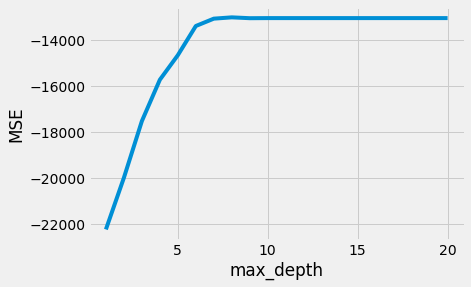

In [21]:
plt.style.use('fivethirtyeight')
print(accuracy_scores[np.argmax(accuracy_scores)])
print(max_depth_range[np.argmax(accuracy_scores)])
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

Luego de iterar sobre distintos valores de max depth se encuentra que para la metrica de calibracion MSE el mejor desepmpeño del modelo se encuentra con **max_depth = 8**

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [22]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [23]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [24]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [25]:
# Celda 6
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


f1_score_arr = []
accuracy_arr = []
model_name_arr = []
y_pred_arr = []

lr = LogisticRegression(random_state=78)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_arr.append(y_pred)
acc = accuracy_score(y_test, y_pred)
accuracy_arr.append(acc)
f1 = f1_score(y_test,y_pred)
f1_score_arr.append(f1)
model_name_arr.append("linear reg")


max_depth_range = range(1, 12)

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    treeReg = DecisionTreeClassifier(max_depth=depth, random_state=78)
    treeReg.fit(X_train,y_train)
    y_pred = treeReg.predict(X_test)
    y_pred_arr.append(y_pred)
    acc = accuracy_score(y_test, y_pred)
    accuracy_arr.append(acc)
    f1 = f1_score(y_test, y_pred)
    f1_score_arr.append(f1)
    model_name_arr.append("arbol_depth{i}".format(i=depth))


0.6513333333333333
arbol_depth4


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

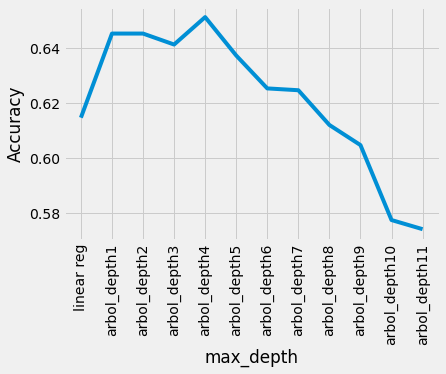

In [26]:
plt.style.use('fivethirtyeight')
print(accuracy_arr[np.argmax(accuracy_arr)])
print(model_name_arr[np.argmax(accuracy_arr)])
plt.plot(model_name_arr, accuracy_arr)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)

0.6616915422885573
arbol_depth5


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

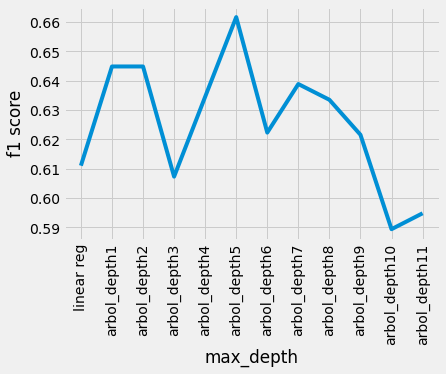

In [27]:
plt.style.use('fivethirtyeight')
print(f1_score_arr[np.argmax(f1_score_arr)])
print(model_name_arr[np.argmax(f1_score_arr)])
plt.plot(model_name_arr, f1_score_arr)
plt.xlabel('max_depth')
plt.ylabel('f1 score')
plt.xticks(rotation=90)

In [28]:
# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad

min_samples_leaf = range(1, 20)
f1_score_arr = []
accuracy_arr = []
model_name_arr = []


for leaf in min_samples_leaf:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    treeReg = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=78)
    treeReg.fit(X_train,y_train)
    y_pred = treeReg.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_arr.append(acc)
    f1 = f1_score(y_test, y_pred)
    f1_score_arr.append(f1)
    model_name_arr.append("arbol_leaf{i}".format(i=leaf))

0.5906666666666667
arbol_leaf12


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

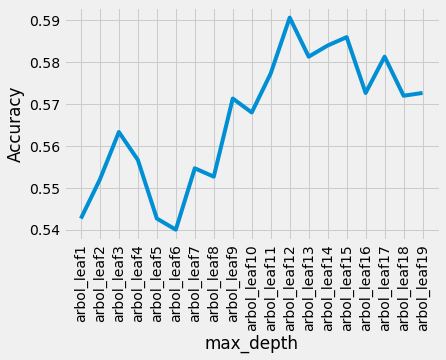

In [29]:
plt.style.use('fivethirtyeight')
print(accuracy_arr[np.argmax(accuracy_arr)])
print(model_name_arr[np.argmax(accuracy_arr)])
plt.plot(model_name_arr, accuracy_arr)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)

0.5828804347826088
arbol_leaf12


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

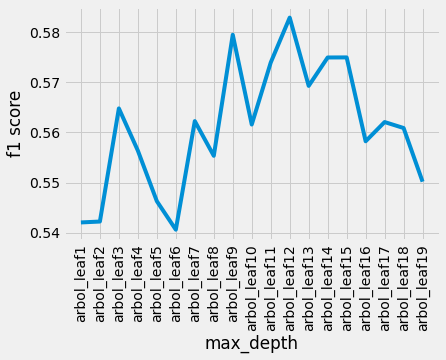

In [30]:
plt.style.use('fivethirtyeight')
print(f1_score_arr[np.argmax(f1_score_arr)])
print(model_name_arr[np.argmax(f1_score_arr)])
plt.plot(model_name_arr, f1_score_arr)
plt.xlabel('max_depth')
plt.ylabel('f1 score')
plt.xticks(rotation=90)

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [31]:
# Celda 7
from sklearn.ensemble import BaggingClassifier


dict_models = {"rt_depth":DecisionTreeClassifier(random_state=53, max_depth=5),
              "rt_samples":DecisionTreeClassifier(random_state=53, min_samples_leaf=12),
              "logreg":LogisticRegression(random_state=53)}



f1_score_arr = []
accuracy_arr = []
model_name_arr = []


for k,mdl in dict_models.items():
    mdl.fit(X_train,y_train)
    y_pred = mdl.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_arr.append(acc)
    f1 = f1_score(y_test, y_pred)
    f1_score_arr.append(f1)
    model_name_arr.append("{i}_nobag".format(i=k))

    clf = BaggingClassifier(mdl, n_estimators=100, bootstrap=True, max_samples=300, oob_score=True, random_state=53)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_arr.append(acc)
    f1 = f1_score(y_test, y_pred)
    f1_score_arr.append(f1)
    model_name_arr.append("{i}_bagging".format(i=k))



0.6633416458852869
rt_depth_nobag


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

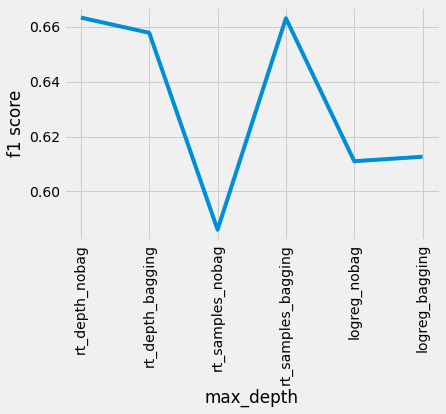

In [32]:
plt.style.use('fivethirtyeight')
print(f1_score_arr[np.argmax(f1_score_arr)])
print(model_name_arr[np.argmax(f1_score_arr)])
plt.plot(model_name_arr, f1_score_arr)
plt.xlabel('max_depth')
plt.ylabel('f1 score')
plt.xticks(rotation=90)

0.6626666666666666
rt_samples_bagging


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

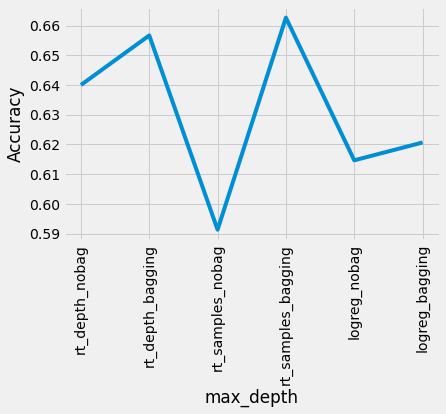

In [33]:
plt.style.use('fivethirtyeight')
print(accuracy_arr[np.argmax(accuracy_arr)])
print(model_name_arr[np.argmax(accuracy_arr)])
plt.plot(model_name_arr, accuracy_arr)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [34]:
dict_models = {"rt_depth":DecisionTreeClassifier(random_state=53, max_depth=5),
              "rt_samples":DecisionTreeClassifier(random_state=53, min_samples_leaf=12),
              "logreg":LogisticRegression(random_state=53)}



f1_score_arr = []
accuracy_arr = []
model_name_arr = []
y_pred_arr = []


for k,mdl in dict_models.items():
    mdl.fit(X_train,y_train)
    y_pred = mdl.predict(X_test)
    y_pred_arr.append(y_pred)
    acc = accuracy_score(y_test, y_pred)
    accuracy_arr.append(acc)
    f1 = f1_score(y_test, y_pred)
    f1_score_arr.append(f1)
    model_name_arr.append("{i}_nobag".format(i=k))

    clf = BaggingClassifier(mdl, n_estimators=100, bootstrap=True, max_samples=300, oob_score=True, random_state=53)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_arr.append(y_pred)
    acc = accuracy_score(y_test, y_pred)
    accuracy_arr.append(acc)
    f1 = f1_score(y_test, y_pred)
    f1_score_arr.append(f1)
    model_name_arr.append("{i}_bagging_nopond".format(i=k))

    errors = np.zeros(clf.n_estimators)
    y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

    #proceso de ponderacion  
    for i in range(clf.n_estimators):
        oob_sample = ~clf.estimators_samples_[i]
        y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
        errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])
        y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
        
    alpha = (1 - errors) / (1 - errors).sum()
    y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)


    acc = accuracy_score(y_test, y_pred)
    accuracy_arr.append(acc)
    f1 = f1_score(y_test, y_pred)
    f1_score_arr.append(f1)
    model_name_arr.append("{i}_bagging_ponderado".format(i=k))



0.6626666666666666
rt_samples_bagging_nopond


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

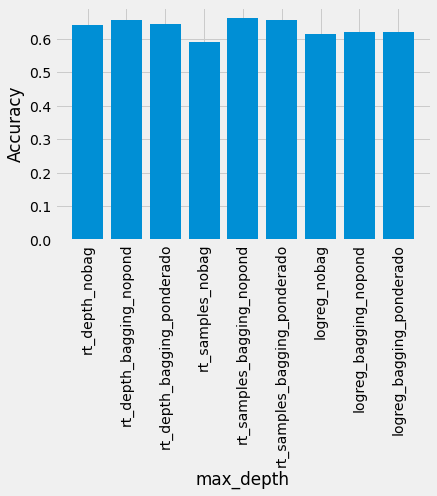

In [35]:
plt.style.use('fivethirtyeight')
print(accuracy_arr[np.argmax(accuracy_arr)])
print(model_name_arr[np.argmax(accuracy_arr)])
plt.bar(model_name_arr, accuracy_arr)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)

0.6633416458852869
rt_depth_nobag


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

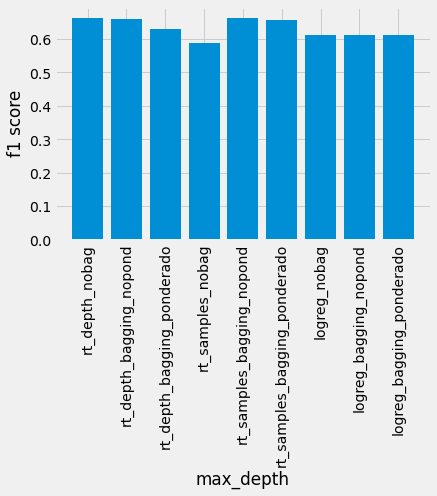

In [36]:
plt.style.use('fivethirtyeight')
print(f1_score_arr[np.argmax(f1_score_arr)])
print(model_name_arr[np.argmax(f1_score_arr)])
plt.bar(model_name_arr, f1_score_arr)
plt.xlabel('max_depth')
plt.ylabel('f1 score')
plt.xticks(rotation=90)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

#### Celda 9

cuando se aplican los modelos de ensamblaje se evidencia una mejora en su desempeño respecto a los modelos *"originales"*, esto se da ya que con el modelo de votacion se mitiga la varianza dada por un solo modelo y se tienen en cuenta distintas observaciones en cada iteracion.

respecto a la diferencia entre la votacion mayoritaria y la votacion ponderada en este caso la votacion ponderada tiene un desempeño menor que la votacion mayoritaria en los modelos de árbol, sin embargo en la regresion logistica si tiene un mejor desempeño.
Esto nos muestra que las distintas soluciones dependen de los modelos aplicados y de la calibracion de hiperparametros de cada uno, no siempre una solucion es mejor de forma universal para todos los problemas, lo cual hace necesario realizar diferentes iteraciones sobre los modelos para encontrar el mejor desempeño